**02452** *Machine Learning*, Technical University of Denmark

- This Jupyter notebook contains exercises where you fill in missing code related to the lecture topic. *First*, try solving each task yourself. *Then* use the provided solution (an HTML file you can open in any web browser) as inspiration if needed. If you get stuck, ask a TA for help.

- Some tasks may be difficult or time-consuming - using the solution file or TA support is expected and perfectly fine, as long as you stay active and reflect on the solution.

- You are not expected to finish everything during the session. Prepare by looking at the exercises *before* the class, consult the TAs *during* class, and complete the remaining parts *at home*.

---

# Week 1: Introduction, data and visualization


**Content:**

- Part 1: Loading data in Python - the Iris flower data set
- Part 2: Cleaning up data in Python
- Part 3: Text-representation in Python


**Objectives:**
- Be able to import data into Python and represent the it in the course format of $\boldsymbol{X}, \boldsymbol{y}$.
- Be able to do common preprocessing steps for datasets.
- Understand the bag of words representation for text documents including filtering methods based on removal of stop words and stemming.
- Understand some of the many ways data can be visualized including histograms, boxplots, and scatter plots.

In [69]:
import numpy as np
import pandas as pd
from scipy.io import loadmat

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer

# Plotting style
sns.set_style('darkgrid')
sns.set_theme(font_scale=1.)

## Introduction

In this exercise we will take a closer look on ways to load data in Python and explore some of the many data visualization techniques we can apply to better understand the content of a dataset. 

We will use a standard data representation throughout this course, by collecting $N$ individual data points $\boldsymbol{x}_i = \left[x_1, x_2, \dots x_M\right]^\top$ with $M$ attributes/features in a data matrix $\boldsymbol{X}$ of size $N\times M$. This means that the $i$'th row in $\boldsymbol{X}$ corresponds to the $i$'th data point, while the $j$'th column contains all observations of the $j$'th attribute. As discussed in the lecture, these attributes can be discrete or continuous and of the types nominal, ordinal, interval or ratio. 

Later in the course we will use the data matrix $\boldsymbol{X}$ for solving both 1) **predictive tasks** where we aim to predict unknown values of some target attribute and 2) **descriptive tasks** where we aim at finding human-interpretable patterns that describe the data.

- Using $\boldsymbol{X}$ for predictive tasks is what we call **supervised learning** and consists of learning a mapping between the attributes in $\boldsymbol{X}$ and a **target attribute**. We will here call $\boldsymbol{X}$ the **input data** and denote the target attribute by $\boldsymbol{y}=\left[y_1, y_2, \dots y_N\right]^\top$ such that there is a target value associated to each $i$'th input data point. We can think of supervised learning as finding a function, $f$, such that our predictions $\hat{\boldsymbol{y}} = f\left(\boldsymbol{X}\right)$ are "close" to the true values in $\boldsymbol{y}$. If the target attribute is discrete we solve a **classification task** while we solve a **regression task** if the target attribute is continues.

- Using $\boldsymbol{X}$ for descriptive tasks is known as **unsupervised learning** and is used for exploratory analyses of the data. Examples of unsupervised learning techniques are 1) clustering techniques that relates to finding hidden group structures $\boldsymbol{X}$, 2) **anomaly detection** that considers finding abnormal data points or 3) **representation learning** where we seek some meaningful latent representations of the data.

In the following exercise, we will get familiar with loading datasets distributed as various types of files into the $\left(\boldsymbol{X}, \boldsymbol{y}\right)$-format described above. We will generally load data into Pandas dataframes as the Pandas library provides flexible tools for data analysis, except when working with more complex data types as text and images.

<br>

---

## Part 1: Loading data in Python - the Iris flower dataset

We consider the Iris flower dataset (downloaded [here](http://archive.ics.uci.edu/ml/datasets/Iris)) - or Fisher's Iris dataset - is a multivariate dataset introduced by Sir Ronald Aylmer Fisher (1936) for the problem of classifying Iris flower types.It is sometimes called Anderson's Iris dataset because Edgar Anderson collected the data to quantify the geographic variation of Iris flowers in the Gaspé Peninsula. The dataset consists of $N=50$ samples from each of $C=3$ species of Iris flowers (Iris setosa, Iris virginica and Iris versicolor). Each observation has $M=4$ attributes measured: the length and the width of sepal and petal, in centimetres, hence $\boldsymbol{x}_i = (x_1,x_2,x_3,x_4)$. Based on the combination of the four variables, Fisher developed a model to distinguish the species from each other - it is used as a typical test for many other classification techniques (see [here](http://en.wikipedia.org/wiki/Iris_flower_data_set)).

A simple format of storing data is the comma-separated values-file format (or CSV). In such files, a sample or an observation is a line in a text document and the document then has as many lines (or rows) as there are samples, i.e. $N$. The attribute values for an observation is written within one line, separated by (usually) a comma or a tab-character in a consistent order. This order is usually defined in a header (the first line of the file), which has a designation of the variable name in some format.

**Task 1.1:** Inspect the `iris.csv` file from the associated data folder. Load the CSV-file using Pandas and split it into the standard $\left(\boldsymbol{X}, \boldsymbol{y}\right)$-format. Make sure to keep $\boldsymbol{X}$ and $\boldsymbol{y}$ as Pandas data types.
> *Hint:* Open the CSV-file using e.g. Notepad for Windows or TextEdit for MacOS.

> *Hint:* Use `df = pd.read_csv()` to load the CSV-file into a Pandas dataframe. Then split it into $\left(\boldsymbol{X}, \boldsymbol{y}\right)$, e.g. using `df.drop()` and `df[target_attr_name]`.

*Hint:*
    
* The class label (the flower species) are stored as text (or strings). 
* Convert it into a categorical attribute using `pd.Categorical()`. Type `help(pd.Categorical)` if you get lost.

In [70]:
### BEGIN SOLUTION

# Load the Iris csv data using the Pandas library
df = pd.read_csv("data/iris/iris.csv")

# -> first four columns are the features
# -> last column is the target attribute (the flower species)

# So we drop the last column to get the features

# Split the data frame into features and labels
X = df.drop(columns=["Type"])
y = pd.Categorical(df["Type"]) # !!

# Or alternatively:
X = df.iloc[:, :-1]                # Assuming the first four columns are features and the last column is the target (-1 or 4)
y = pd.Categorical(df.iloc[:, 4])

### END SOLUTION

# Check the shape of the data
N, M = X.shape
assert N == 150, "There should be 150 samples in the Iris dataset."
assert M == 4, "There should be 4 features in the Iris dataset."

# Display the first few rows of the dataframe
X.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Sometimes datasets are distributed as Excel-files `.xls(x)`. 

**Task 1.2:** Load the same Iris data, when it has been stored as an Excel-file using Pandas. Split it into the standard $\left(\boldsymbol{X}, \boldsymbol{y}\right)$-format as before.
> *Hint:* Open `iris.xls` in the data folder to have a look at the file.

> *Hint:* Use `df = pd.read_excel()` to load an Excel-file into a Pandas dataframe. For furhter information, type `help(pd.read_excel)`

In [71]:
### BEGIN SOLUTION

# Load excel file with pandas
df = pd.read_excel("data/iris/iris.xls")

# check out the data
print(df.head())
# Again, the first four columns are the features and the last column is the target attribute (the flower species)

# Split the data frame into features and labels
X = df.drop(columns=["Type"])   # df.drop(columns=[df.columns[-1]]) or df.iloc[:, :-1] also works
y = pd.Categorical(df["Type"])  # convert the strings to categoricals

### END SOLUTION

# Check the shape of the data
N, M = X.shape
assert N == 150, "There should be 150 samples in the Iris dataset."
assert M == 4, "There should be 4 features in the Iris dataset."

# Display the first few rows of the dataframe
X.head()

   Sepal Length  Sepal Width  Petal Length  Petal Width         Type
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Other times data is stored as MATLAB files (`.mat`). 

**Task 1.3:** Load the same Iris data, when it has been stored in the MATLAB-file `iris.mat`. 
> *Hint:* Use `data = scipy.io.loadmat()` to load the data file. Check the data structure, e.g. using `data.keys()`, to see what information it contains.

**Task 1.4:** Split it into the standard $\left(\boldsymbol{X}, \boldsymbol{y}\right)$-format and convert $\boldsymbol{X}$ and $\boldsymbol{y}$ to Pandas datatypes.
> *Hint:* In MATLAB-files, strings are stored in Numpy arrays. To extract the string information, use a list comprehension on the form: `[val.item() for val in data['key_in_the_dictionary'].flatten()]`

> *Hint:* Use `pd.Dataframe()` to construct a Pandas dataframe from a `np.Array`. Type `help(pd.DataFrame)` to figure out how to name the columns.

> *Hint:* You should construct $\boldsymbol{y}$ as a `pd.Categorical` with the class names as the values. The information is available in `data`.

In [72]:
import scipy

### BEGIN SOLUTION

# Load from matlab
data = scipy.io.loadmat("data/iris/iris.mat")

# data.keys() returns a list of all the keys in the dictionary 'data'
print(data.keys()) # ['__header__', '__version__', '__globals__', 'C', 'M', 'N', 'X', 'y', 'attributeNames', 'classLabels', 'classNames']

# data.items() returns a list of (key, value) pairs in the dictionary 'data'
for key, value in data.items():
    print(f"\t\t{key}: {type(value)})")

# Inspect attributeNames
print(f"\ndata['attributeNames']: {data['attributeNames']}")

# Extract features and labels
X = pd.DataFrame(data['X'], columns=[attr.item() for attr in data['attributeNames'].flatten()]) # name the columns
y = pd.Categorical([label.item() for label in data['classLabels'].flatten()]) # convert to categorical

### END SOLUTION

# You should construct $\boldsymbol{y}$ as a `pd.Categorical` with the class names as the values. The information is available in `data`.
# Construct y as a pd.Categorical using the class labels for each sample
class_labels = [val.item() for val in data['classLabels'].flatten()]
y = pd.Categorical(class_labels)

# Check the shape of the data
N, M = X.shape
assert N == 150, "There should be 150 samples in the Iris dataset."
assert M == 4, "There should be 4 features in the Iris dataset."

# Display the first few rows of the dataframe
X.head()

dict_keys(['__header__', '__version__', '__globals__', 'C', 'M', 'N', 'X', 'attributeNames', 'classLabels', 'classNames', 'y'])
		__header__: <class 'bytes'>)
		__version__: <class 'str'>)
		__globals__: <class 'list'>)
		C: <class 'numpy.ndarray'>)
		M: <class 'numpy.ndarray'>)
		N: <class 'numpy.ndarray'>)
		X: <class 'numpy.ndarray'>)
		attributeNames: <class 'numpy.ndarray'>)
		classLabels: <class 'numpy.ndarray'>)
		classNames: <class 'numpy.ndarray'>)
		y: <class 'numpy.ndarray'>)

data['attributeNames']: [[array(['Sepal Length'], dtype='<U12')]
 [array(['Sepal Width'], dtype='<U11')]
 [array(['Petal Length'], dtype='<U12')]
 [array(['Petal Width'], dtype='<U11')]]


,Sepal Length,Sepal Width,Petal Length,Petal Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


For some modeling tasks, working with Pandas dataframes is cumbersome. Luckily, we can easily convert Pandas datatypes into numerical of type `np.Array` if we stored the data correctly. In the following cell, we do so for the Iris dataset:

In [73]:
# Convert X and y to numpy arrays
X_numpy, y_numpy = X.values, y.codes

# Print the first 5 samples of X and y
print(f"X: {X_numpy[:5, :]}")
print(f"\ny: {y_numpy[:5]}")

X: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

y: [0 0 0 0 0]


In the examples up until now, we have handled the data in the Iris dataset as if to solve a classification problem. We could say that the **primary machine learning modelling aim** is to classify the species of Iris flower based on the petal and sepal dimensions. However, we could also use the dataset to illustrate how to do regression without needing to use a whole different dataset. We would achieve this by e.g. trying to predict either of the petal (or sepal) dimensions based on the remaining dimensions, for instance. This changes how we define our $\left(\boldsymbol{X}, \boldsymbol{y}\right)$-format.

**Task 1.5:** Cast the Iris dataset into a regression problem. To do so, set up the $\left(\boldsymbol{X}, \boldsymbol{y}\right)$-format in Pandas such that we are predicting the petal lengths from the other continuous attributes.
> *Hint:* Use `df.drop()` to remove the target attribute and non-continuous variable.

In [74]:
### BEGIN SOLUTION

# Extract the length and width features (that are not the target variable)
X_regression = df.drop(columns=["Petal Length", "Type"])
X_regression = df.loc[:, ["Sepal Length", "Sepal Width", "Petal Width"]] # alternatively

# Set the target variable for regression
y_regression = df["Petal Length"]

### END SOLUTION

# Check the shape of the regression data
N_reg, M_reg = X_regression.shape
assert N_reg == 150, "There should be 150 samples in the Iris dataset."
assert M_reg == 3, "There should be 3 features in the Iris regression dataset."

# Display the first few rows of the regression dataframe
X_regression.head()

,Sepal Length,Sepal Width,Petal Width
0,5.1,3.5,0.2
1,4.9,3.0,0.2
2,4.7,3.2,0.2
3,4.6,3.1,0.2
4,5.0,3.6,0.2


#### Basic plotting in Python

In the following we will do an initial data analysis of the Iris dataset through basic plots of the attributes. We will recreate the plots in section 7.1 of the course book.

**Task 1.8:** Plot histograms of the four attributes using `plt.subplots()`. Argue from the graph that the petal length is either between 1 and 2 cm. or between 3 and 7 cm. but that no flowers in the dataset have a petal length between 2 and 3 cm. Do you think this could be useful to discriminate between the different types of flowers?
> *Hint:* Check the documentation using `help(plt.subplots)`.

> *Hint:* Use `plt.hist()` to plot a histogram.

> *Hint:* Use indexing to extract each attribute. For example, `df.iloc[:, j-1]` extracts the $j$'th attribute.

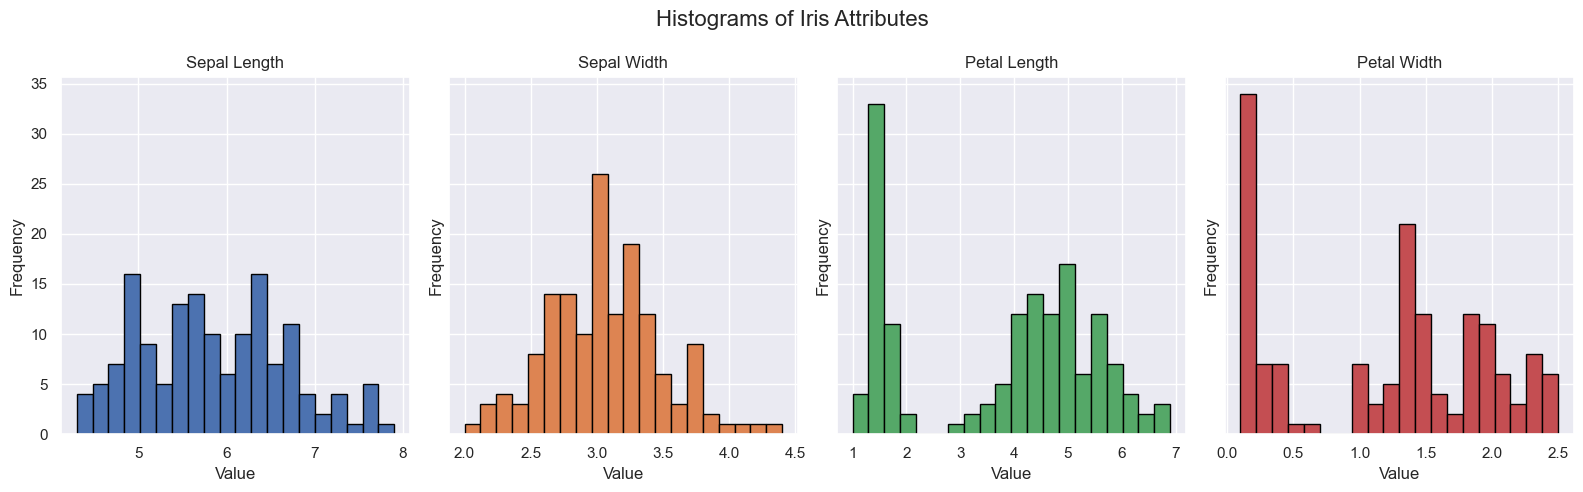

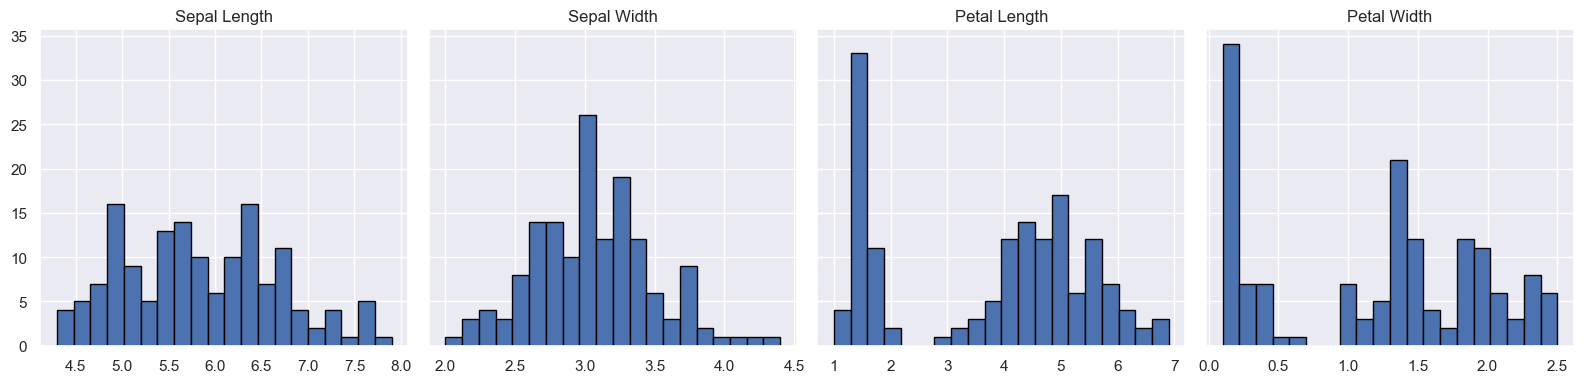

In [75]:
### BEGIN SOLUTION

# Creating figures manually gives some flexibility that is nice when 
# you have a specific layout in mind. This is nice for reports or publications.

fig, axs = plt.subplots(1, 4, figsize=(16, 5), sharey=True) # deel y- (sharey) of x-as (sharex) (True/'all', False/'none', 'row', 'col')
fig.suptitle("Histograms of Iris Attributes", fontsize=16)
for j in range(4):
    axs[j].hist(df.iloc[:, j], color=f"C{j}", bins=20, edgecolor='black') 
    # -> f"C{j}" is a nice way to get different colors
    # -> een bin is een interval
    # -> de waarden onderverdelen in bins (van gelijke grootte) noemen we 'binning'
    # edgecolor niet vergeten
    axs[j].set_title(df.columns[j])
    axs[j].set_xlabel("Value")
    axs[j].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

# Or alternatively, using Pandas' built-in plotting which is more convenient for quick visualizations.
# This will automatically create a histogram for each of the first four columns.
# Set colors for each attribute
df.hist(column=df.columns[:4], figsize=(16, 4), bins=20, edgecolor='black', layout=(1, 4), sharey=True)
plt.tight_layout()
plt.show()

### END SOLUTION

**Task 1.9:** Produce a boxplot of the four attributes in the Iris data. This boxplot shows the same information as the histogram in the previous exercise. Discuss the advantages and disadvantages of the two types of plots.
> *Hint:* Use the function `plt.boxplot()` for creating the figure.

- *Answer:* 

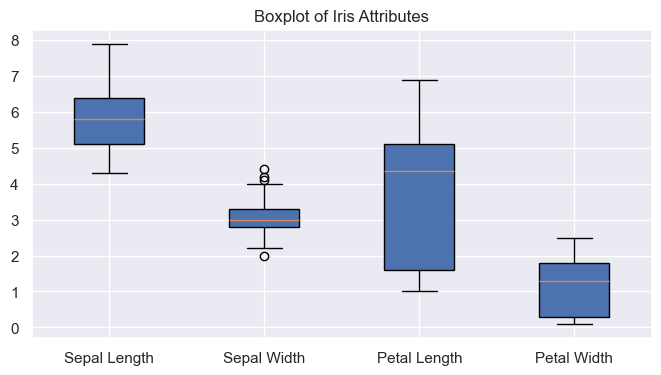

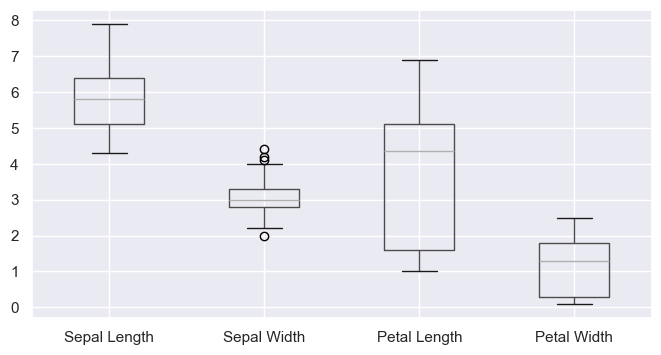

In [76]:
#  Produce a boxplot of the four attributes in the Iris data. This boxplot shows the same information as the histogram in the previous exercise. Discuss the advantages and disadvantages of the two types of plots.

fig = plt.figure(figsize=(8, 4))
# fig = ... zorgt ervoor dat we bijvoorbeeld de titel achteraf kunnen toevoegen
plt.title("Boxplot of Iris Attributes")
plt.boxplot(df.iloc[:, :4], vert=True, patch_artist=True, tick_labels=df.columns[:4]) # patch_artist=True zorgt voor kleur: "A patch is a 2D artist with a face color and an edge color."
plt.show()

# Or alternatively, using Pandas' built-in boxplot function.
# This will automatically create a boxplot for each of the first four columns.
df.iloc[:, :4].boxplot(vert=True, patch_artist=False, labels=df.columns[:4], figsize=(8, 4))
plt.show()

**Task 1.10:** Create a figure using `plt.subplots()` that contains boxplots for each attribute for each class as in Figure 7.2 in the course book. Show on the graph that all the Iris-setosa in this dataset have a petal length between 1 and 2 cm. Do you think we would be able to distinguish between the Iris types from the measured sepal and petal length? Why/why not?

> *Hint:* You can split the Pandas dataframe into subsets based on a specific attribute using `df.groupby()`.

> *Hint:* Make sure to specify `sharey=True` when creating the subplot structure. This allows us to compare the values more easily.

- *Answer:* 

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


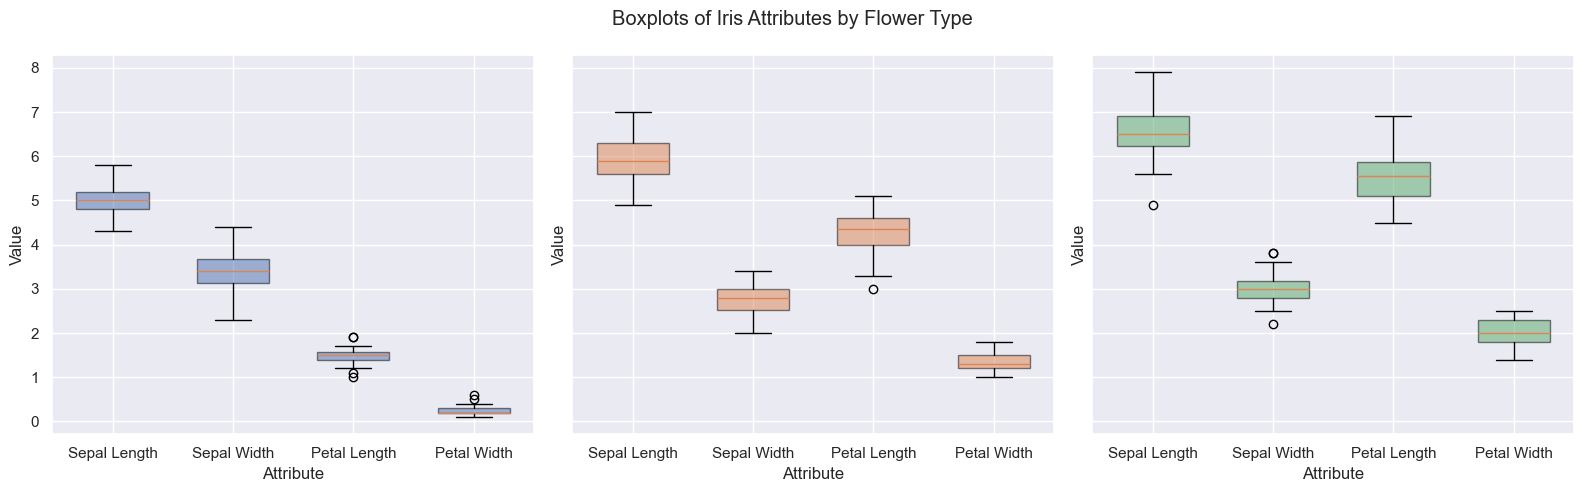

In [77]:
### BEGIN SOLUTION

fig, axs = plt.subplots(1, 3, figsize=(16, 5), sharey=True) # deel y-as
fig.suptitle("Boxplots of Iris Attributes by Flower Type") # overall title

print(type(df.groupby("Type")))
# Returns a pandas DataFrameGroupBy object
print(enumerate(df.groupby("Type"))) 
# Returns an enumerate object: 
# -> paren (index, (groupname, group_dataframe))

# Split the dataframe into subsets based on the "Type" column
for plot_idx, (species, subset) in enumerate(df.groupby("Type")):

    # Plot boxplots for each species
    # We use ax=axs[plot_idx] to plot on the correct subplot

    # With pandas
    # subset.plot(kind='box', ax=axs[plot_idx], title=species, legend=False, color=f"C{plot_idx}", patch_artist=False, vert=True) 

    # Or manually with matplotlib for more control
    for j in range(4):
        bp = axs[plot_idx].boxplot(
            subset.iloc[:, j],
            positions=[j],
            widths=0.6,
            patch_artist=True
        )
        # Set box color
        for box in bp['boxes']:
            box.set(facecolor=f"C{plot_idx}", alpha=0.5)

        axs[plot_idx].set_xticks(range(4))
        axs[plot_idx].set_xticklabels(df.columns[:4])
        axs[plot_idx].set_xlabel("Attribute")
        axs[plot_idx].set_ylabel("Value")

plt.tight_layout()
plt.show()

### END SOLUTION

**Task 1.11:** Create a matrix scatter plot using `plt.subplots()` of each combination of two attributes against each other as shown in in Figure 7.6 in the course book. Say you want to discriminate between the three types of flowers using only the length and width of either sepal or petal. Argue from the graph why it would be better to use petal length and width rather than sepal length and width.
> *Hint:* To make a scatter plot, you can use the function `plt.scatter()` and fill the plots with two for-loops. Remember to keep track of the axes!

> *Hint:* Another way to extract the data of a specific class, is to write `df.query('Type == "Iris-setoa"')`.

> *Hint:* For the diagonal plots, we could also choose more informative plots than the scatter plot. Try filling it with the histograms.

- *Answer:*


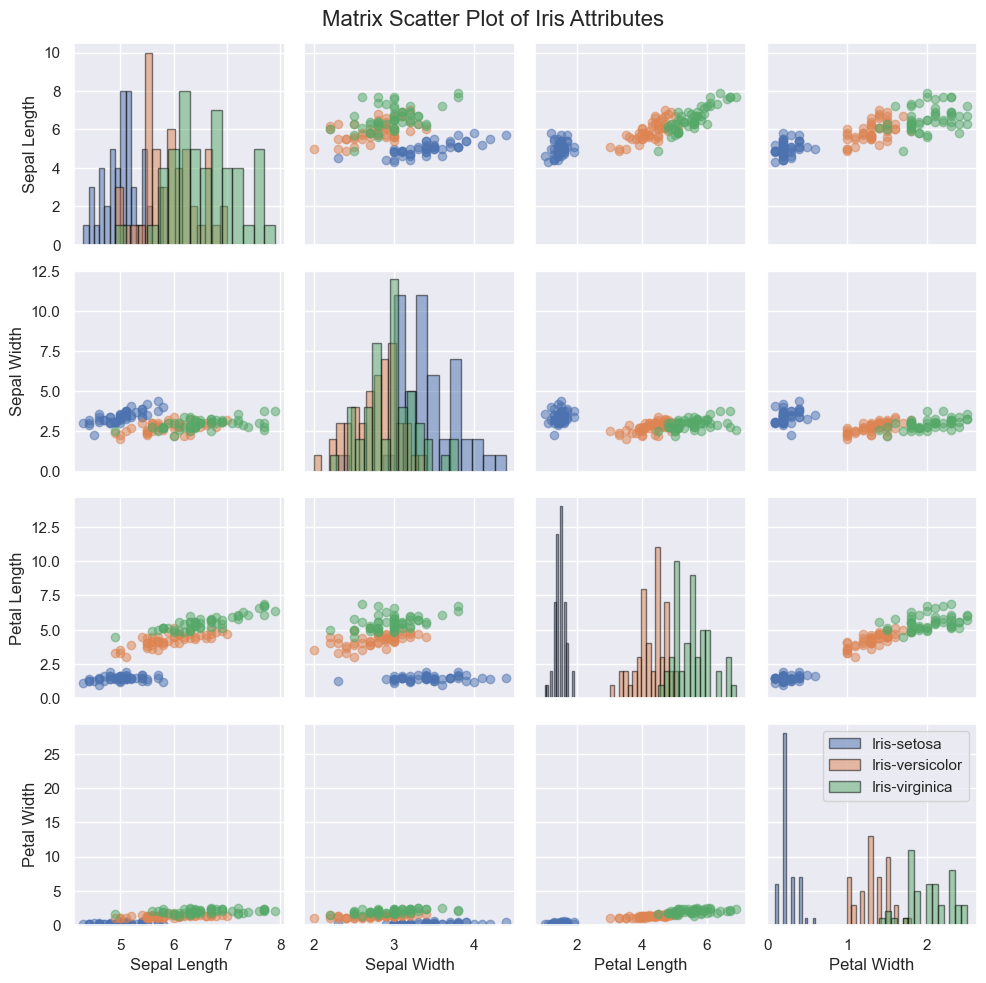

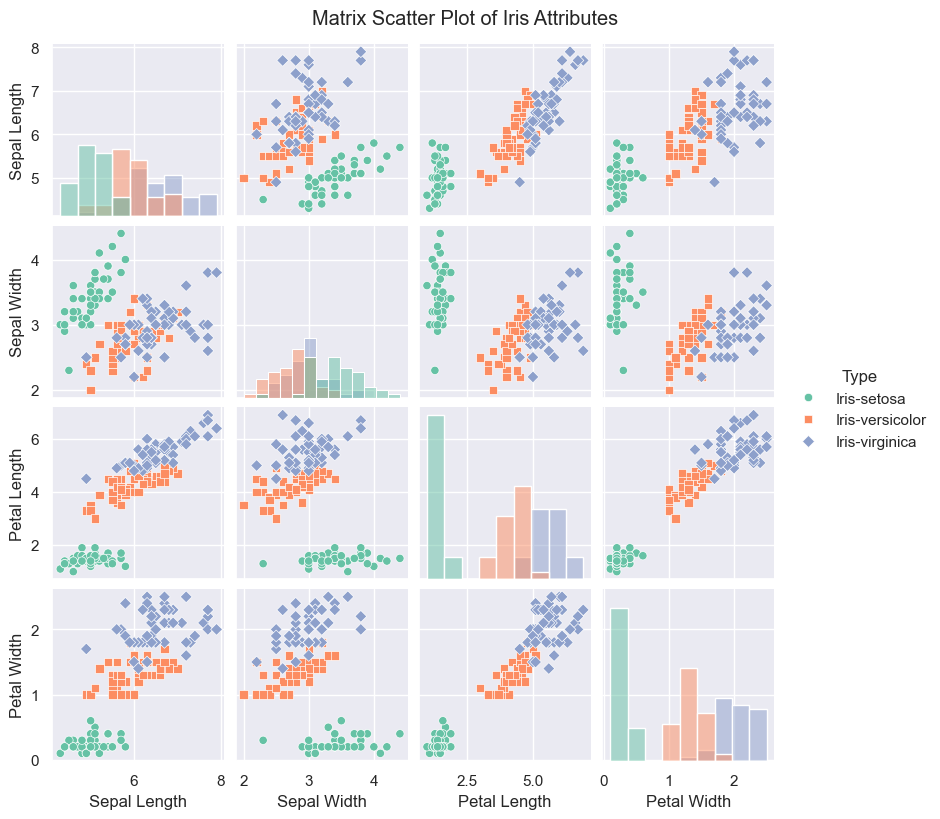

In [78]:
### BEGIN SOLUTION

fig, axs = plt.subplots(4, 4, figsize=(10, 10), sharex='col', sharey='row')
# Deel x-assen voor kolommen en y-assen voor rijen

list_of_species = df["Type"].unique() # get unique species

fig.suptitle("Matrix Scatter Plot of Iris Attributes", fontsize=16) # overall title

# Loop over i (rows) and j (columns)
for i in range(4):
    for j in range(4):

        # loop through each species
        for (species_index, species) in enumerate(list_of_species): 

            # Filter the dataframe for the current species
            subset = df.query(f'Type == "{species}"')

            if i == j:
                # Plot the histogram on the diagonal
                axs[i, j].hist(
                    subset.iloc[:, j], # values for the $j$'th attribute
                    label=species, alpha=0.5, color=f"C{species_index}", bins=15, edgecolor='black'
                )
            
            else:
                # Plot the scatter plot for attribute pair (if not on the diagonal)
                axs[i, j].scatter(
                    x=subset.iloc[:, j],        # x-values for the $j$'th attribute
                    y=subset.iloc[:, i],        # y-values for the $i$'th attribute
                    label=species, alpha=0.5
                )

        if j == 0: # Set the y-label for the first column!!
            axs[i, j].set_ylabel(df.columns[i])
        if i == 3: # Set the x-label for the last row!!
            axs[i, j].set_xlabel(df.columns[j])

# Add the legend to the last subplot only!!
axs[3,3].legend(loc='upper right')
plt.tight_layout(pad=1.)
plt.show()

# Or alternatively using Seaborn's pairplot which is more convenient for quick visualizations.
sns.pairplot(df, hue="Type", markers=["o", "s", "D"], palette="Set2", diag_kind="hist", height=2.)
plt.suptitle("Matrix Scatter Plot of Iris Attributes", y=1.02)
plt.show()

### END SOLUTION

**Task 1.12:** Produces a 3-dimensional scatter plot of three attributes as shown in Figure 7.7 in the course book. Try rotating the data. Can you find an angle where the three types of flower are separated in the plot? Discuss the pros and cons of visualizing data in 2 and 3 dimensions, respectively? How would you plot data that is inherently 4 dimensional or higher?
> *Hint:*  You can add a 3D subplot element by `ax = fig.add_subplot(111, projection='3d')`. Read more about plotting in 3 dimensions [here](matplotlib.sourceforge.net/mpl_toolkits/mplot3d/tutorial.html).

> *Hint:* In Jupyter notebooks, you can open the plots in a separate window (for interaction) by writing the cell magic `%matplotlib qt` in the top of the cell. Contrarily, what you've done so far is inline plotting with `%matplotlib inline`.

- *Answer:* 

Text(0.5, 0, 'Petal Length')

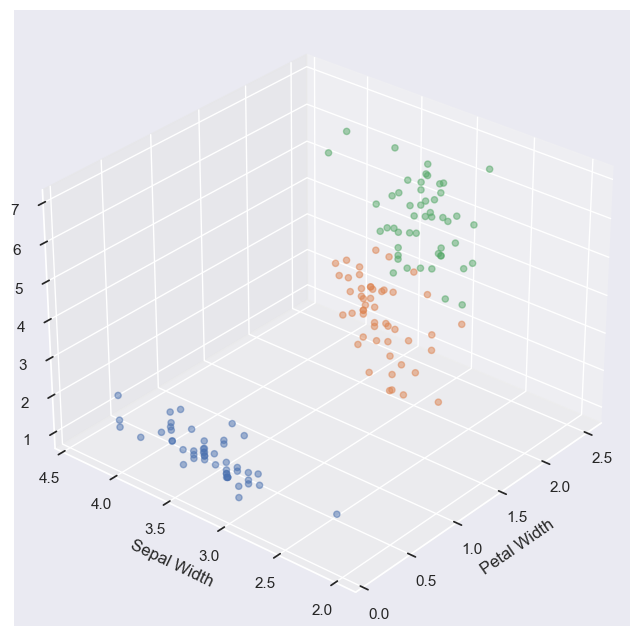

In [79]:
# %matplotlib qt 
# This opens an interactive window for 3D plotting. 
# We have been using `%matplotlib inline` before, instead.

### BEGIN SOLUTION
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d') # same as add_subplot(1,1,1, projection='3d'), where 111 means 1 row, 1 column, 1st subplot

# Indices of the variables to plot
selected_attributes = [3, 1, 2]

for class_idx, (species, subset) in enumerate(df.groupby("Type")):
    # Plot the scatter plot for each species
    ax.scatter(
        subset.iloc[:, selected_attributes[0]], 
        subset.iloc[:, selected_attributes[1]], 
        subset.iloc[:, selected_attributes[2]], 
        label=species,
        color=f"C{class_idx}",
        alpha=0.5
    )

ax.view_init(30, 220)
ax.set_xlabel(df.columns[selected_attributes[0]])
ax.set_ylabel(df.columns[selected_attributes[1]])
ax.set_zlabel(df.columns[selected_attributes[2]])
# plt.show()

### END SOLUTION

**Task 1.13:** Apply standardization to the data matrix $\boldsymbol{X}$ that we constructed in the first part of the exercise so that it has zero mean and unit standard deviation. Plot the standardized data matrix as an image. What does this plot indicate?
> *Hint:* You can use the function `plt.imshow()` to plot an image. Check out the documentation of this function.

> *Hint for interpreting the plot:* the data matrix is ordered according to the sorted class labels!

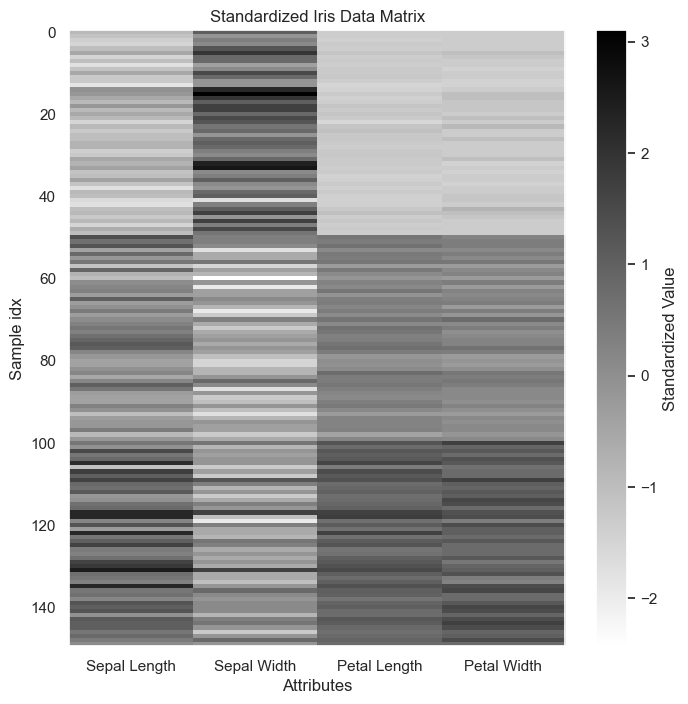

In [80]:
%matplotlib inline 
# go back to inline plotting

### BEGIN SOLUTION

# Standardization of the data matrix X
X_standardized = (X - X.mean(axis=0)) / X.std(axis=0)

# Plot the standardized data matrix as an image
fig = plt.figure(figsize=(8, 8))
plt.imshow(X_standardized, aspect='auto', cmap='gray_r')
plt.colorbar(label='Standardized Value')
plt.title("Standardized Iris Data Matrix")
plt.xticks(ticks=np.arange(X_standardized.shape[1]), labels=X.columns, rotation=0)
plt.xlabel("Attributes")
plt.ylabel("Sample idx")
plt.grid(False)

### END SOLUTION

A question that we need to ask ourselves is whether the dataset is suitable for solving our primary machine learning aim, which we here define as being classification. 

**Task 1.14:** Do you think that we would be able to fit a classification model on the Iris dataset? Argue based on the figures you generated. What if we change the primary machine learning aim to be the regression task mentioned earlier?

> *Hint:* Consider which attributes we defined as *target* and *input* attributes, respectively, for the two modeling tasks.

- *Answer:* 

    - we wouden bij regressie `Petal Length` voorspellen op basis van `Sepal Length`, `Sepal Width` en `Petal Width`. Dit lijkt goed mogelijk, aangezien er een duidelijk verband is tussen deze variabelen. 

    - Echter, als we bij classificatie `Type` als target zouden nemen, zou dit een stuk moeilijker zijn. Vooral `Iris-versicolor` en `Iris-virginica` zijn lastig te onderscheiden op basis van de andere variabelen. Dit is ook terug te zien in de boxplots en scatter plots.

You are welcome to try out other plotting methods for the data. Matplotlib online repository is a good source of inspiration: https://matplotlib.org/stable/gallery/index.html

<br>

---

## Part 2: Cleaning up data in Python

While the Iris dataset is a real dataset, it is a very clean and easy to work with dataset. Usually, data is a bit messier, and we will consider a toy dataset that has some common issues. Often, the description of "real-world" data is stored along with the data in some form of a text file. Have a look at the folder `messy_data` in the data folder and read more about the toy dataset - notice that there is a `README.txt` file.

**Task 2.1:** Inspect the data in `messy_data.data` and try to identify some issues (use e.g. simple text editor as before). What issues did you find?

- *Answer:* 
    - some questionmarks
    - some missing values (zeroes in `disp` and `horsepower`)

**Task 2.2:** Load the messy dataset using `pd.read_csv()`.
> *Hint:* Even though `messy_data.data` is not a `.csv`-file, we can load it by specifying the argument `sep=\t` as the values are tab-separated.

> *Hint:* What index is the header in the file? Specify this with the `header` argument.

> *Hint:* To remove the header from the values of the dataframe, use `messy_data.drop()`

In [81]:
### BEGIN SOLUTION

# Load the messy data file using pandas
messy_data = pd.read_csv("data/messy_data/messy_data.data", sep="\t", header=1)

# Remove the first row which contains the attribute names
messy_data = messy_data.drop(messy_data.index[0])

### END SOLUTION

# Check the shape of the messy data
N, M = messy_data.shape
assert N == 29, "There should be 29 samples in the messy dataset."
assert M == 9, "There should be 9 features in the messy dataset."

# Display the messy dataframe
messy_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
1,18,8,?,130,3'504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3'693,"11,5",70,1,buick skylark 320
3,18,8,?,150,3'436,11.0,70,1,plymouth satellite
4,16,8,?,150,3'433,12.0,70,1,amc rebel sst
5,17,8,0,140,3'449,"10,5",70,1,ford torino
6,15,8,429,198,4'341,10.0,70,1,ford galaxie 500
7,14,8,454,220,4'354,9.0,70,1,chevrolet impala
8,14,8,?,215,4312,"8,5",70,1,plymouth fury iii
9,14,8,455,225,4425,10.0,70,1,pontiac catalina
10,15,8,390,190,3'850,"8,5",70,1,amc ambassador dpl


At this point, youll see that some of the missing values from the data has already been represented as `NaN`s (in the displacement column). However, these were only the places where an empty element was in the file. We also see that the weight attribute uses **' as the thousand separator** which is bad practice in Python. For the acceleration attribute we even see inconsistency in whether commas or dots are used as the decimal separator - in Python, we use dots.

**Task 2.3:** Remove the question marks in displacement and replace them with not a number, i.e. `NaN` and solve the problems of the separator signs for the weight and acceleration attribute.
> *Hint:* Use the method `.str.replace("?", "NaN")` to modify the specific attribute on the string level for each data input. Use the same function for handling the separator issues.

In [82]:
print((messy_data == '?').iloc[:4, :]) 
# first 4 rows to see what this returns 
# -> a pd DataFrame of booleans!!

# Now filter the dataframe to replace '?' with np.nan
messy_data[messy_data == '?'] = np.nan

# Alternative for handling missing values and separator issues
messy_data.displacement = messy_data.displacement.str.replace('?', 'NaN')
messy_data.weight = messy_data.weight.str.replace("'", "")
messy_data.acceleration = messy_data.acceleration.str.replace(",", ".")

messy_data.head()

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
1  False      False          True       False   False         False   
2  False      False         False       False   False         False   
3  False      False          True       False   False         False   
4  False      False          True       False   False         False   

   modelyear  origin  carname  
1      False   False    False  
2      False   False    False  
3      False   False    False  
4      False   False    False  


,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,carname
1,18,8,NaN,130,3504,12.0,70,1,chevrolet chevelle malibu
2,15,8,350,165,3693,11.5,70,1,buick skylark 320
3,18,8,NaN,150,3436,11.0,70,1,plymouth satellite
4,16,8,NaN,150,3433,12.0,70,1,amc rebel sst
5,17,8,0,140,3449,10.5,70,1,ford torino


In the `README.txt` it is stated that "zeroes in the attributes MPG and displacement can be considered missing values". 

**Task 2.4:** Replace the zeros in these attributes, since a zero might be correct for some other variables.
> *Hint:* You can use `.replace` like before, but do not need to do it on the string level.

In [83]:
### BEGIN SOLUTION
messy_data.mpg = messy_data.mpg.replace({"0": np.nan})
messy_data.displacement = messy_data.displacement.replace({"0": np.nan})
### END SOLUTION

The `README.txt` does not supply a lot of information about what the levels of the "origin" attribute describe, so we either have to make an educated guess based on the values in the context, or preferably obtain the information from any papers that might be references in the `README`. From inspection of "origin" and "car names", you should see that (north) American cars are valued by 1, European cars are valued by 2 and Asian cars are valued by 3.

**Task 2.5:** Convert the "origin" attribute to a categorical attribute labeled as described above. Next, apply one-out-of-$K$ encoding to the attribute (as we did with the Iris data) and remove the `carname` attribute.
> *Hint:* Convert the attribute to a categorical Pandas attribute. The you can use the method `.rename_categories()`.

In [84]:
### BEGIN SOLUTION

# Convert the values of the origin attribute to labels
messy_data['origin'] = pd.Categorical(
    messy_data.origin.astype(int)).rename_categories({1: "American", 2: "European", 3: "Asian"}
)

# Apply one-out-of-K encoding to the origin attribute

# GET_DUMMIES():
# -> Convert categorical variable into dummy/indicator variables.
# -> Each variable is converted in as many 0/1 variables as there are different values. 
# -> Columns in the output are each named after a value; if the input is a DataFrame, the name of the original variable is prepended to the value.

print(type(messy_data.origin))
# series, not a dataframe
# so we need to explicitly mention the prefix

# Create a dataframe with a column for each category
# The column names are prefixed with 'Origin='
origin_encoded = pd.get_dummies(messy_data.origin, prefix='Origin', prefix_sep='=', dtype=int)
print(f"Type of origin_encoded: {type(origin_encoded)}")
print(f"Head of origin_encoded:")
print(origin_encoded.head())

# Concatenate the encoded origin with the rest of the data and drop the original 'origin' column, together with 'carname'
messy_data = pd.concat([
    messy_data.drop(columns=['origin', 'carname']), 
    origin_encoded], 
axis=1)

messy_data.head()

### END SOLUTION

<class 'pandas.core.series.Series'>
Type of origin_encoded: <class 'pandas.core.frame.DataFrame'>
Head of origin_encoded:
   Origin=American  Origin=European  Origin=Asian
1                1                0             0
2                1                0             0
3                1                0             0
4                1                0             0
5                1                0             0


,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,Origin=American,Origin=European,Origin=Asian
1,18,8,NaN,130,3504,12.0,70,1,0,0
2,15,8,350,165,3693,11.5,70,1,0,0
3,18,8,NaN,150,3436,11.0,70,1,0,0
4,16,8,NaN,150,3433,12.0,70,1,0,0
5,17,8,NaN,140,3449,10.5,70,1,0,0


We later on find out that a value of 99 for the MPG is not value that is within reason for the MPG of the cars in this dataset, hence it is an outlier. The observations that has this value of MPG is therefore incorrect, and we should treat the value as missing. So far, the data has been of string type, however, it is easier to define filters if we convert the numerical attributes to being numerical.

**Task 2.6:** Convert the numerical attributes into numerical-valued columns in the Pandas datafram. Add a line of code to remove the data point (rows) where MPG $= 99$.
> *Hint:* You can index multiple columns of the dataframe using a list of column names, i.e. `messy_data[[name1, name2, ...]]`

> *Hint:* Use `.astype(float)` to convert the string-valued attributes to numerical.

> *Hint:* For filtering out the outlier, you can create a mask like `messy_data.mpg != x` and apply it to the dataframe.

In [85]:
### BEGIN SOLUTION

# all columns except the last one should be numerical
messy_data[messy_data.columns[:7]] = messy_data[messy_data.columns[:7]].astype(float)

# Remove rows where mpg is 99
mask = messy_data.mpg != 99
messy_data = messy_data[mask]

### END SOLUTION

N, M = messy_data.shape
assert N == 28, "There should be 28 samples in the cleaned messy dataset."

We still have the missing values. In the following we will go through how you could go about handling the missing values before making the $\left(\boldsymbol{X},\boldsymbol{y}\right)$-matrices as above. Various apporaches can be used, but it is important to keep it mind to never do any of them blindly. Keep a record of what you do, and consider/discuss how it might affect your modelling.

**The simplest way of handling missing values is to drop any records that display them**, we do this by first determining where there are missing values.

**Task 2.7:** Using Python, determine which observations (rows) contain missing values. Next, remove all observations that holds at least 1 missing value. Store the resulting dataframe in a variable called `clean_data`.
> *Hint:* You can use `.isna().any()` to identify observations with NaN values. What axis should `.any()` be applied on?

> *Hint:* The operator `~` negates the values of a boolean array, i.e. if `A = np.array([True, False])` then `~A = np.array([False, True])`.

In [ ]:
### BEGIN SOLUTION

# messy_data.isna() returns a DataFrame of the same shape as messy_data, with True where the value is NaN and False otherwise
print(messy_data.isna().head())

# Determine which observations (rows) contain at least one missing value with .any(axis=1)
missing_value_rows = messy_data.isna().any(axis=1)

# Remove all observations that hold at least 1 missing value
# (intvert ~ to get the rows without missing values)
clean_data_v1 = messy_data[~missing_value_rows]
# or
# clean_data_v1 = messy_data.dropna()

### END SOLUTION

# Check the shape of the cleaned data
N, M = clean_data_v1.shape
assert N == 15, "There should be 24 samples in the cleaned messy dataset."
assert M == 10, "There should be 10 features in the cleaned messy dataset after one-out-of-K encoding."

# Display the cleaned dataframe
clean_data_v1

     mpg  cylinders  displacement  horsepower  weight  acceleration  \
1  False      False          True       False   False         False   
2  False      False         False       False   False         False   
3  False      False          True       False   False         False   
4  False      False          True       False   False         False   
5  False      False          True       False   False         False   

   modelyear  Origin=American  Origin=European  Origin=Asian  
1      False            False            False         False  
2      False            False            False         False  
3      False            False            False         False  
4      False            False            False         False  
5      False            False            False         False  


,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,Origin=American,Origin=European,Origin=Asian
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,0,0
6,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1,0,0
7,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1,0,0
9,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1,0,0
10,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1,0,0
15,24.0,4.0,113.0,95.0,2372.0,15.0,70.0,0,0,1
19,27.0,4.0,97.0,88.0,2130.0,14.5,70.0,0,0,1
21,33.0,4.0,105.0,74.0,2190.0,14.2,81.0,0,1,0
22,33.7,4.0,107.0,75.0,2210.0,14.4,81.0,0,0,1
23,32.4,4.0,108.0,75.0,2350.0,16.8,81.0,0,0,1


Another approach to handling missing values is to check whether the majority of missing values comes from **specific attributes**. By visual inspection (either from plotting the dataframe using `plt.imshow()` or by checking the dataframe values), we see that the third column, i.e. the displacement attribute, is the major reason we have missing values.

**Task 2.8:** Go back to the `messy_data` dataframe. Remove the displacement attribute (for now) and then remove the few observations (rows) containing missing values. Store the resulting dataframe in a variable `clean_data_v2`.
> *Hint:* Another way to remove rows with missing values is using the Pandas method `.dropna()`.

In [ ]:
### BEGIN SOLUTION
print("Number of missing values in each column:")
print(messy_data.isna().sum())

# Remove the displacement attribute and then remove the few observations with missing values
clean_data_v2 = messy_data.drop(columns=['displacement']).dropna()
### END SOLUTION

# Check the shape of the cleaned data
N, M = clean_data_v2.shape
assert N == 26, "There should be 26 samples in the cleaned messy dataset after removing displacement."
assert M == 9, "There should be 9 features in the cleaned messy dataset after removing displacement."

# Display the cleaned dataframe
clean_data_v2

Missing values in each column:
mpg                 2
cylinders           0
displacement       11
horsepower          0
weight              0
acceleration        0
modelyear           0
Origin=American     0
Origin=European     0
Origin=Asian        0
dtype: int64


,mpg,cylinders,horsepower,weight,acceleration,modelyear,Origin=American,Origin=European,Origin=Asian
1,18.0,8.0,130.0,3504.0,12.0,70.0,1,0,0
2,15.0,8.0,165.0,3693.0,11.5,70.0,1,0,0
3,18.0,8.0,150.0,3436.0,11.0,70.0,1,0,0
4,16.0,8.0,150.0,3433.0,12.0,70.0,1,0,0
5,17.0,8.0,140.0,3449.0,10.5,70.0,1,0,0
6,15.0,8.0,198.0,4341.0,10.0,70.0,1,0,0
7,14.0,8.0,220.0,4354.0,9.0,70.0,1,0,0
8,14.0,8.0,215.0,4312.0,8.5,70.0,1,0,0
9,14.0,8.0,225.0,4425.0,10.0,70.0,1,0,0
10,15.0,8.0,190.0,3850.0,8.5,70.0,1,0,0


Lastly, one could **impute** the missing values - which means to "guess them", in some sense - while trying to minimize the impact of the guess. A simply way of imputing them is to replace the missing values with the median of the attribute. In our specific case, we would have to do this for the missing values for attributes MPG and displacement.

**Task 2.9:** Go back to the `messy_data` dataframe. Replace missing values in the MPG and displacement columns with their respective median values. Store the resulting dataframe in a varible called `clean_data_v3`.
> *Hint:* For computing the median of an attribute containing NaN-values, use `np.nanmedian` or the Pandas method `.median()`. We will take a closer look on summary statistics next week.

> *Hint:* Checkout the Pandas method `.fillna()`.

In [92]:
# Another approach to handling missing values is to fill them with the median of each column
# This is useful when we want to keep all observations and avoid losing data

# Fill missing values with the median of each column (use pandas fillna and np.nanmedian or pandas .median())
print(messy_data.median())
clean_data_v3 = messy_data.fillna(messy_data.median())
# or = messy_data.fillna(np.nanmedian(messy_data, axis=0))

N, M = clean_data_v3.shape
assert N == 28, "There should be 28 samples in the cleaned messy dataset after filling missing values."
assert M == 10, "There should be 10 features in the cleaned messy dataset after filling missing values."

mpg                  19.5
cylinders             6.0
displacement        145.0
horsepower          118.0
weight             3123.0
acceleration         13.2
modelyear            70.0
Origin=American       1.0
Origin=European       0.0
Origin=Asian          0.0
dtype: float64


**Task 2.10:** Which of the methods do you prefer? Which of the cleaned data versions contains most information? Why is this useful in a machine learning context?

Perfect! Now our data is cleaned up and we would actually be able to use it for solving a regression or classification task! Let's try to construct the $\left(\boldsymbol{X}, \boldsymbol{y}\right)$ matrices. One idea could be to try to predict the weight of the cars based on the remaining attributes. This means that we will have to solve a regression problem.

**Task 2.11:** Split the `clean_data_v3` into the $\left(\boldsymbol{X}, \boldsymbol{y}\right)$-format such that the target attribute is "weight".

In [94]:
# YOUR CODE HERE
X = clean_data_v3.drop(columns=['weight']) # X = features
y = clean_data_v3['weight'] # y = target variable for regression (weight)

Given the data split, we will sometimes need to consider common feature transformations such as **standardization and binarization/thresholding**. 
- Standardization can be useful for being able to compare data attributes measured on very different scales and works by subtracting the mean and dividing by the standard deviation for each attribute, respectively, and sometimes it is also important to standardize the target attribute itself! 
- Binarization and thresholding can be used to e.g. construct a discrete classification target attribute from a continuous-valued attribute.

**Task 2.12:** Create a standardized version of the data matrix called `X_standardized`. Do the same for the target attribute and store it in `y_standardized`. Lastly, discretize the weight target attribute into 3 categories being "low", "medium" and "high".
> *Hint:* Use Pandas methods `.mean()` and `.std()` when standardizing $\boldsymbol{X}$ and $\boldsymbol{y}$. What axis should you compute the values over?

> *Hint:* To discretize a continuous attribute with Pandas, use `pd.cut()`. Check the documentation with `help(pd.cut)` for further information.

In [97]:
print(X.mean(axis=0)) # axis=0 means column-wise mean

### BEGIN SOLUTION

# Standardize the features
X_standardized = (X - X.mean(axis=0)) / X.std(axis=0)
# Standardize the target variable
y_standardized = (y - y.mean()) / y.std()

# Discretize the weight target attribute into 3 categories
# you can also define specific bin edges if needed, e.g. bins=[0, 1500, 3000, 4500]
y_discretized = pd.cut(y, bins=3, labels=["low", "medium", "high"], include_lowest=True)

### END SOLUTION

# Check the standardized features and target variable
assert (X_standardized.mean(axis=0) < 1e-5).all(), "The mean of the standardized features should be close to 0."
assert (abs(X_standardized.std(axis=0) - 1) < 1e-5).all(), "The standard deviation of the standardized features should be close to 1."
assert (y_standardized.mean() < 1e-5), "The mean of the standardized target variable should be close to 0."
assert abs(y_standardized.std() - 1) < 1e-5, "The standard deviation of the standardized target variable should be close to 1."

mpg                 21.592857
cylinders            6.285714
displacement       187.178571
horsepower         129.785714
acceleration        13.317857
modelyear           73.535714
Origin=American      0.571429
Origin=European      0.142857
Origin=Asian         0.285714
dtype: float64


**Optional:** Below we show an example of how to use the dataset to fit a supervised learning method. In this scenario we consider a linear regression model. In the coming weeks, we will get to know many more supervised learning techniques. We evaluate the predictions using the root-mean-square error - how can we interpret this value?

In [ ]:
from sklearn.linear_model import LinearRegression

# Example of fitting a supervised learning model, e.g. a linear regression model, using sklearn
model = LinearRegression()      # define the model
model.fit(X, y)                 # fit the model to the data
y_hat = model.predict(X)        # predict the target variable using the model on all data

# Compute the RMSE (Root Mean Squared Error)
#   ->  this is a common metric for regression tasks as it measures the average magnitude 
#       of the errors between predicted and actual values.
RMSE = np.sqrt(np.mean(np.power(y_hat - y, 2)))
print(f"RMSE: {RMSE:.2f}")

RMSE: 248.64


## Part 3: Text-representation in Python (Optional)

### Text data

In the previous tasks, we learned how to load and manipulate tabular data as well as some techniques for visualizing the attributes. However, not all data follows the tabular data structure and we will presently consider one such example.

An important area of research in machine learning and data mining is the **analysis of text documents**. Here, important tasks are 
- to be able to search documents 
- group related documents together (clustering)

In order to accomplish these tasks the **text documents is converted into a format suitable for data modeling**. 

### Text representation

We will use the **bag of words** representation:
- documents are stored in a matrix $\boldsymbol{X}$
- rows correspond to documents
- columns correspond to words in a vocabulary
- $x_{ij}$ indicates how many times word $j$ occurred in document $i$.

Suppose that we have 5 text documents, each containing just a single sentence:

> Document 1: The Google matrix $P$ is a model of the internet.
>
> Document 2: $P_{ij}$ is nonzero if there is a link from webpage $i$ to $j$.
>
> Document 3: The Google matrix is used to rank all Web pages.
>
> Document 4: The ranking is done by solving a matrix eigenvalue problem. 
>
> Document 5: England dropped out of the top 10 in the FIFA ranking. 

**Taske 3.1:** Propose a suitable **bag of words** representation for these documents (use pen and paper). You should choose approximately 10 key words in total defining the columns in the document-term matrix and the words are to be chosen such that each document at least contains 2 of your key words, i.e. the document-term matrix should have approximately 10 columns and each row of the matrix must at least contain 2 non-zero entries.

| Document | matrix | Google | ranking | rank | webpage | internet | model | eigenvalue | FIFA | top |
|----------|--------|--------|---------|------|---------|----------|-------|------------|------|-----|
| Doc 1    | 1      | 1      | 0       | 0    | 0       | 1        | 1     | 0          | 0    | 0   |
| Doc 2    | 1      | 0      | 0       | 0    | 2       | 0        | 0     | 0          | 0    | 0   |
| Doc 3    | 1      | 1      | 1       | 0    | 0       | 0        | 0     | 0          | 0    | 0   |
| Doc 4    | 1      | 0      | 0       | 1    | 0       | 0        | 0     | 1          | 0    | 0   |
| Doc 5    | 0      | 0      | 1       | 0    | 0       | 0        | 0     | 0          | 1    | 1   |

In practice, we can carry out this procedure **automatically** using the **scikit-learn library**, or `sklearn`. 

We will use a function from the **feature extraction-module**, called `CountVectorizer` to generate a document-term matrix and to convert it into the course format, i.e. $\boldsymbol{X}$. Note, that we will **use the words "term" and "token" interchangeably**.

**Task 3.2:** Inspect the `textDocs.txt`-file provided in the associated data folder.

As you might have seen, the data is no longer following a fixed structure as in the CSV-files that we previously worked with. Instead of using Pandas for loading the data we will directly read the lines of the `txt`-file. Read and understand the code for loading the documents in the cell below.

In [104]:
# Open the txt-file and read its content
with open('data/BoW/textDocs.txt', 'r') as f:
    raw_file = f.read()

# The raw file is a single string with all content of the file
# We need to split it into individual documents/sentences using \n as the delimiter
corpus = raw_file.split('\n')

print(f"Intermediate corpus with empty lines: {corpus}")

# Next, we remove the empty lines ('') from the corpus
corpus = list(filter(None, corpus))

# Display the content of the corpus
print("Corpus (5 documents/sentences):")
print(np.asmatrix(corpus)) # 5 rijen met 1 kolom
print(np.shape(corpus)) # 5, 1
print()

Intermediate corpus with empty lines: ['The Google matrix P is a model of the internet', '', '', 'P_ij is nonzero if there is a link from webpage i to j', '', '', 'The Google matrix is used to rank all Web pages', '', '', 'The ranking is done by solving a matrix eigenvalue problem', '', '', 'England dropped out of the top 10 in the FIFA ranking']
Corpus (5 documents/sentences):
[['The Google matrix P is a model of the internet'
  'P_ij is nonzero if there is a link from webpage i to j'
  'The Google matrix is used to rank all Web pages'
  'The ranking is done by solving a matrix eigenvalue problem'
  'England dropped out of the top 10 in the FIFA ranking']]
(5,)



**Task 3.3:** Construct the document-term matrix as a `np.array` using `CountVectorizer` and compare the generated document-term matrix to the one you generated yourself.
> *Hint:* Make sure that you have the `sklearn`-package installed.

> *Hint:* Read more about the `CountVectorizer` using `help(CountVectorizer)` after it has been imported from `sklearn`.

We define a `CountVectorizer` to convert the corpus into a document-term matrix.
- The token pattern is a **regular expression** (marked by the `r`), which ensures
    - that the vectorizer ignores digit/non-word tokens 
    - in this case, it ensures the 10 in the last document is not recognized as a **token** (=word). 
    - It's not important that you should understand the regexp.

In [ ]:
# We define a CountVectorizer to convert the corpus into a document-term matrix.
vectorizer = CountVectorizer(token_pattern=r"\b[^\d\W]+\b")

# Fit the vectorizer to the corpus
vectorizer.fit(corpus)

# Extract the terms/tokens from the vectorizer
terms = vectorizer.get_feature_names_out()

# Transform the corpus into the document-term matrix
X = vectorizer.transform(corpus).toarray()

# Check the shape of the document-term matrix
N, M = X.shape
assert N == 5, "There should be 5 documents in the corpus."
assert M == 36, "There should be 36 terms in the document-term matrix."

print("Number of documents (data points, N):\t %i" % N)
print("Number of terms (attributes, M):\t %i" % M)
print("\nTerms in the document-term matrix:")
print(terms)
print("\nDocument-term matrix:")
print(X)

Number of documents (data points, N):	 5
Number of terms (attributes, M):	 36

Terms in the document-term matrix:
['a' 'all' 'by' 'done' 'dropped' 'eigenvalue' 'england' 'fifa' 'from'
 'google' 'i' 'if' 'in' 'internet' 'is' 'j' 'link' 'matrix' 'model'
 'nonzero' 'of' 'out' 'p' 'p_ij' 'pages' 'problem' 'rank' 'ranking'
 'solving' 'the' 'there' 'to' 'top' 'used' 'web' 'webpage']

Document-term matrix:
[[1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 1 1 0 0 2 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0]
 [1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 2 0 0 1 0 0 0]]


### Stop words

When working with text documents, it is common to remove so-called **stop words**.

**Stop words** are words that one can find in virtually **any** document. Therefore, the occurrence of such a word in a document **does not distinguish the document** from other documents. The following is the beginning of one particular **stop word list**:
> a, a's, able, about, above, according, accordingly, across,   actually, after, afterwards, again, against, ain't, all, allow,  allov, ahnost, alone, along, already, also, although, always, am,  among, amongst, an, and, another, any, anybody, anyhow, anyone,  anything, anyway, anyways, anywhere, apart, appear, appreciate,  appropriate, are, around, as, aside,ask, ....

When forming the document-term it is **common to remove these specified stop words.**

The generated document-term matrix contains words that carry little information such as the word "the". We will remove these words as they can be interpreted as "noise" carrying no information about the content of the documents. 

**Task 3.4:** Load the stop words from the `stopWords.txt`-file in the associated data folder. Compute a new document-term matrix with stop words removed - how does it compare to your original
matrix?

> *Hint:* You can load the stop words similarly to how we loaded the documents. 

> *Hint:* Once the stop words are loaded, they can be parsed to the `CountVectorizer` using the keyword `stop_words`.

In [108]:
### BEGIN SOLUTION

# Load and process the stop words in a similar manner:
with open("data/BoW/stopWords.txt", "r") as f:
    raw_file = f.read()
stopwords = raw_file.split("\n")

# Define a CountVectorizer with awareness of stop words
vectorizer = CountVectorizer(token_pattern=r"\b[^\d\W]+\b", stop_words=stopwords)

# Fit the vectorizer to the corpus
vectorizer.fit(corpus)

# Extract the terms/tokens from the vectorizer
terms = vectorizer.get_feature_names_out()

# Transform the corpus into the document-term matrix
X = vectorizer.transform(corpus).toarray()

### END SOLUTION

# Check the shape of the document-term matrix
N, M = X.shape
assert N == 5, "There should be 5 documents in the corpus."
assert M == 19, "There should be 19 terms in the document-term matrix."
print("Number of documents (data points, N):\t %i" % N)
print("Number of terms (attributes, M):\t %i" % M)

# Show the document-term matrix as a Pandas dataframe for better overview
pd.DataFrame(X, columns=terms)

Number of documents (data points, N):	 5
Number of terms (attributes, M):	 19


,dropped,eigenvalue,england,fifa,google,internet,link,matrix,model,nonzero,p_ij,pages,problem,rank,ranking,solving,top,web,webpage
0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
3,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0
4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


### Stemming

**Stemming** denotes the **process for reducing inflected** (or sometimes derived) **words to their stem, base or root form**. The stem need not be identical to the morphological root of the word; it is usually **sufficient that related words map to the same stem**, *even if this stem is not in itself a valid root*. Clearly, from the point of view of information retrieval, no information is lost in the following stemming reduction:
$$
    \begin{equation*}
    \left.\begin{array}{l}
        \text{computable}\\
        \text{computing}\\
        \text{computed}\\
        \text{computational}\\
        \text{computation}\\
    \end{array}\right\}\rightarrow \text{comput}
\end{equation*}
$$

Document 3, 4 and 5 have the word "rank" in common. However in document 4 and 5 this word is stored as a the separate word entry "rank*ing*" in the document-term matrix whereas in document 3 it is stored as the word entry "rank". As such, the document-term matrix does not indicate that document 3, 4 and 5 share the word "rank". By the use of stemming we can obtain a matrix that indicate that the word "rank" appears in all 3 documents. 

In the following cell, we will show you how to apply the the `PorterStemmer` from the `nltk` package and create a new document-term matrix.
> Make sure you have the `nltk`-package installed.

**Task 3.5:** Inspect the document-term matrix after stemming. How does it compare to your original matrix?

In [109]:
# We'll use a widely used stemmer based:
# Porter, M. “An algorithm for suffix stripping.” Program 14.3 (1980): 130-137.
from nltk.stem import PorterStemmer

# Make an object based on the PorterStemmer class
stemmer = PorterStemmer()
# Construct an analyzer for generating the document-term matrix
analyzer = CountVectorizer(
    token_pattern=r"\b[^\d\W]+\b", 
    stop_words=stopwords
).build_analyzer()

# Using this we make a function that can stem words:
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

# ... and finally, we create a new vectorizer just like we've done before:
vectorizer_with_stemming = CountVectorizer(analyzer=stemmed_words)

# Fit the vectorizer to the corpus
vectorizer_with_stemming.fit(corpus)
# Extract the terms/tokens from the vectorizer
terms = vectorizer_with_stemming.get_feature_names_out()
# Transform the corpus into the document-term matrix
X = vectorizer_with_stemming.transform(corpus).toarray()

# Check the shape of the document-term matrix
N, M = X.shape
assert N == 5, "There should be 5 documents in the corpus."
assert M == 18, "There should be 18 terms in the document-term matrix."
print("Number of documents (data points, N):\t %i" % N)
print("Number of terms (attributes, M):\t %i" % M)

# Show the document-term matrix as a Pandas dataframe for better overview
pd.DataFrame(X, columns=terms)

Number of documents (data points, N):	 5
Number of terms (attributes, M):	 18


,drop,eigenvalu,england,fifa,googl,internet,link,matrix,model,nonzero,p_ij,page,problem,rank,solv,top,web,webpag
0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
3,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0
4,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


### Searching documents

Based on our document-term representation we can now make simple searches (queries) in our documents based on some form of **similarity measure** between our **query vector** and document-term representation. 

#### Query vector

Lets say we want to find all documents that are relevant to the query:
> "**solving** for the **rank** of a **matrix**.'' 

This is represented by a query vector, $\boldsymbol{q}$, constructed in a way analogous to the document-term matrix, $\boldsymbol{X}$, hence
$$
    \boldsymbol{q} = \left[\begin{array}{ccccccccccccccccc}
      0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 1 & 0 & 0 & 0
    \end{array}\right]^\top
$$

#### Measure of similarity

We will use the **cosine distance** as a measure of similarity between the $i$'th document $\boldsymbol{x}_i$ and the query vector $\boldsymbol{q}$, i.e. 
$$
  \mathrm{cos}(\boldsymbol{q},\boldsymbol{x}_i)=\frac{\boldsymbol{q}}{\|\boldsymbol{q}\|}\cdot\frac{\boldsymbol{x}_i}{\|\boldsymbol{x}_i\|} =\frac{\boldsymbol{q}^\top\boldsymbol{x}_i}{\|\boldsymbol{q}\|\|\boldsymbol{x}_i\|}
$$
We will learn much more about measures of similarity next week. 

**Task 3.6:** Compute the cosine similarity between each document and the query using a) pen and paper (i.e. compute the inner products between the relevant vectors) and b) using `numpy`. Explain what documents, according to our similarity measure, are most related to the query and verify that Document 4 is the most similar one.
> *Hint:* You can extract a document (row of the `X` matrix) using the command `x=X[i, :]` `i` is the index of the document.

> *Hint:* Numpy matrices and arrays can be transposed using notation `x.T` or `x.transpose()`.

> *Hint:* Dot products between two row vectors can be computed as `np.dot(q, x.T)` (or simply `q @ x.T`).

> *Hint:* The norm of a vector can be computed using the function `np.linalg.norm()`.

In [112]:
# Define the query vector
q = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

# Print terms in the query vector
print("Terms in the query vector: ", terms[q == 1])

# notice, that you could get the query vector using the vectorizer, too:
q = vectorizer_with_stemming.transform(['matrix rank solv'])
q = np.asarray(q.toarray())
print(q)

# or use any other string:
# q = vectorizer_with_stemming.transform(['Can I Google how to fix my problem?'])
# q = np.asarray(q.toarray())


### BEGIN SOLUTION

# Solution 1: one line of code using matrix-vector products and no iterations --> fast !
cosine_similarities = q @ X.T / (np.linalg.norm(q) * np.linalg.norm(X, axis=1))
cosine_similarities = cosine_similarities.reshape(-1, 1)  # reshape to a column vector

# Soltution 2: using a 'for' loop to iterate over the documents
cosine_similarities = np.zeros((N, 1)) # allocate space for the cosine similarities
for i in range(N):
    x_i = X[i, :]  # get the i-th document vector
    cosine_similarities[i] = q / np.linalg.norm(q) @ x_i.T / (np.linalg.norm(x_i))  # compute the cosine similarity

### END SOLUTION


# Display the result
print("Query vector:\n {0}\n".format(q))
print("Similarity results:\n {0}".format(cosine_similarities))

Terms in the query vector:  ['matrix' 'rank' 'solv']
[[0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0]]
Query vector:
 [[0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0]]

Similarity results:
 [[0.28867513]
 [0.        ]
 [0.51639778]
 [0.77459667]
 [0.25819889]]


**Optional:** If you find text processing exciting, read more about Natural Language Processing toolkit. Here is a good place to start: http://www.nltk.org/book/